In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('./imdbtop100.csv')
df.head()

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886","In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...


<Figure size 1000x800 with 0 Axes>

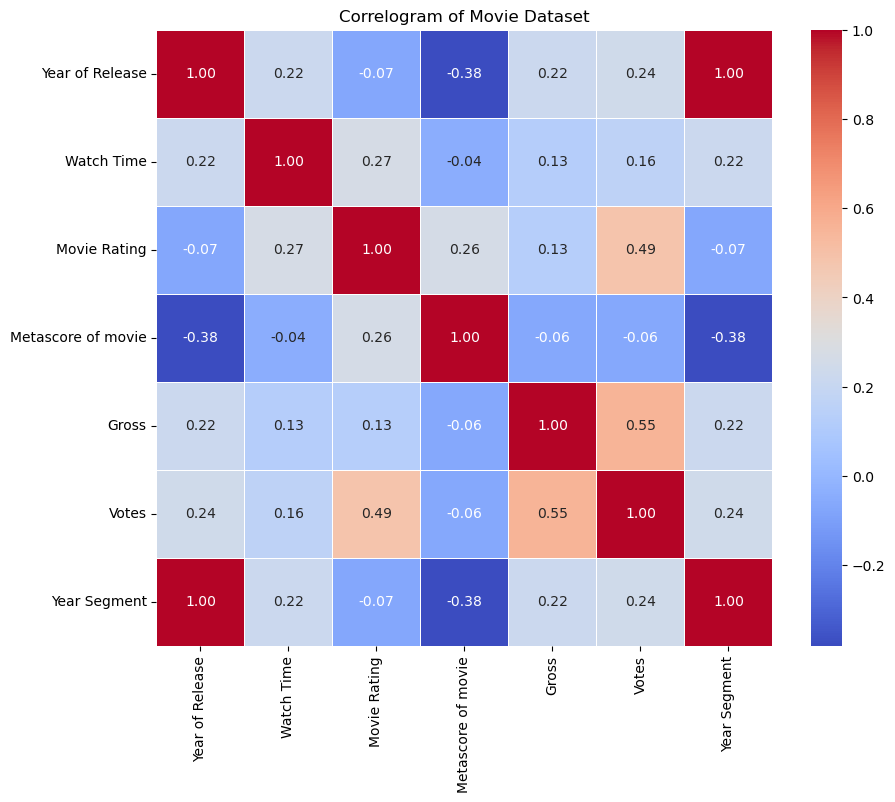

In [ ]:
import seaborn as sns

df_custom = df.drop(columns=['Unnamed: 0', 'Movie Name'])
corr = df_custom.corr(numeric_only=True) # numeric_only=True --FIX

plt.figure(figsize=(10, 8))

# Convert 'Gross' and 'Votes' columns to numeric, removing any non-numeric characters
df_custom['Gross'] = pd.to_numeric(df_custom['Gross'].str.replace(',', ''), errors='coerce')
df_custom['Votes'] = pd.to_numeric(df_custom['Votes'].str.replace(',', ''), errors='coerce')

corr = df_custom.corr(numeric_only=True) # numeric_only=True FIX

plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Correlogram of Movie Dataset')
plt.show()

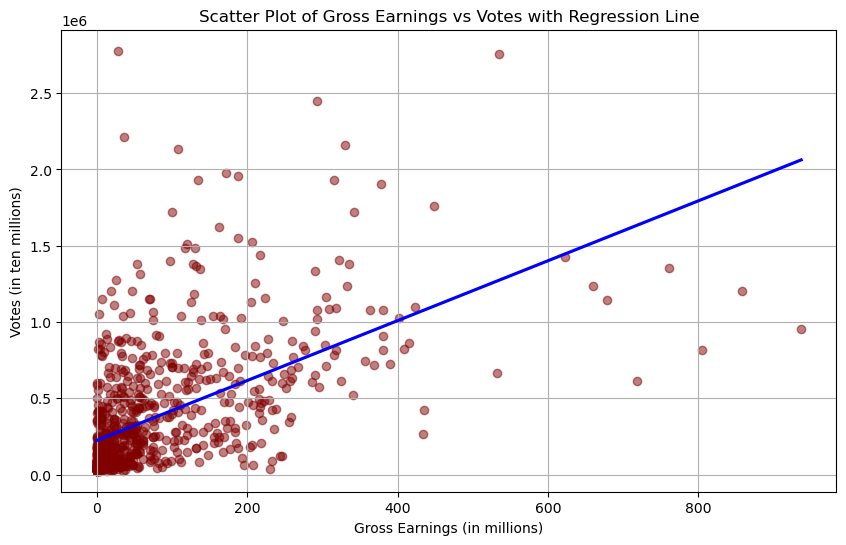

In [28]:
# both votes and gross is a way to see how popular a movie is. 

df_custom = df_custom.dropna(subset=['Gross', 'Votes'])

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Gross', y='Votes', data=df_custom, scatter_kws={'alpha':0.5, 'color':'maroon'}, line_kws={'color':'blue'}, ci=None)
plt.xlabel('Gross Earnings (in millions)')
plt.ylabel('Votes (in ten millions)')
plt.title('Scatter Plot of Gross Earnings vs Votes with Regression Line')
plt.grid(True)
plt.show()

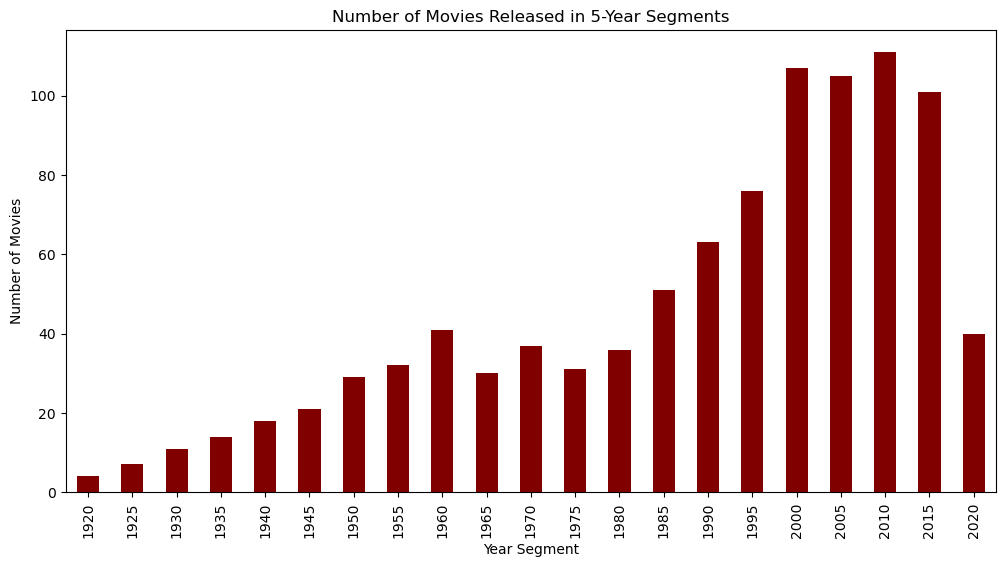

In [ ]:
# we can use this graph to see the increase in numbers of movies produce over the years, we can also see a drop in 2020 bc of the pandemic

# Convert 'Year of Release' to numeric, invalid parsing will be set as NaN
df['Year of Release'] = pd.to_numeric(df['Year of Release'], errors='coerce') --> fix error

# Drop rows with NaN values in 'Year of Release'
df = df.dropna(subset=['Year of Release'])

# Convert 'Year of Release' to integer
df['Year of Release'] = df['Year of Release'].astype(int)


df['Year Segment'] = (df['Year of Release'] // 5) * 5

movies_per_segment = df.groupby('Year Segment').size()

plt.figure(figsize=(12, 6))
movies_per_segment.plot(kind='bar', color='maroon')
plt.xlabel('Year Segment')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released in 5-Year Segments')
plt.grid(False)
plt.show()

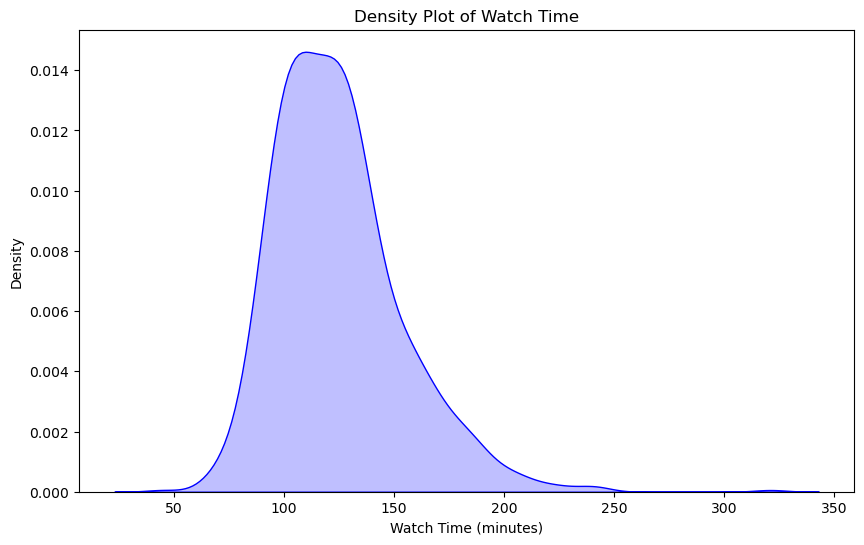

In [31]:
# can see the density or most occuring thing in each feature, as well as normal or skewed distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Watch Time'], color='blue', fill=True)
plt.title('Density Plot of Watch Time')
plt.xlabel('Watch Time (minutes)')
plt.ylabel('Density')
plt.show()
